##**Análise exploratória dos dados**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights5.csv?raw=True')

In [121]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,10,AJ,Airbus A320,schengen,MEH,16.748745,18.748745,0,2010,False,38.999178
1,16,HX,Airbus A330,non-schengen,EXD,17.047995,19.047995,0,2010,False,21.181293
2,15,AJ,Airbus A330,schengen,QRA,17.516443,21.516443,0,2010,False,54.581541
3,19,HX,Boeing 737,schengen,XFM,9.706046,12.706046,0,2010,False,57.561943
4,29,HX,Boeing 737,schengen,MEH,16.148951,18.148951,0,2010,False,49.325330


In [122]:
df.shape

(71175, 11)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [124]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin                9
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
dtype: int64

In [125]:
df['schengen'].unique()

array(['schengen', 'non-schengen'], dtype=object)

In [126]:
df['is_holiday'].unique()

array([False,  True])

##**Pré-processamento dos dados**

In [127]:
# Transformando valores das colunas schengen e is_holiday
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [128]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,10,AJ,Airbus A320,1,MEH,16.748745,18.748745,0,2010,0,38.999178
1,16,HX,Airbus A330,0,EXD,17.047995,19.047995,0,2010,0,21.181293
2,15,AJ,Airbus A330,1,QRA,17.516443,21.516443,0,2010,0,54.581541
3,19,HX,Boeing 737,1,XFM,9.706046,12.706046,0,2010,0,57.561943
4,29,HX,Boeing 737,1,MEH,16.148951,18.148951,0,2010,0,49.325330


In [129]:
# Lista de variáveis categóricas
categorical_vars = ['airline', 'aircraft_type', 'origin']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [130]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AJ,airline_EJ,...,aircraft_type_Embraer E175,origin_EXD,origin_HQL,origin_KVJ,origin_MEH,origin_QRA,origin_QVJ,origin_SWB,origin_XFM,origin_XOO
0,10,1,16.748745,18.748745,0,2010,0,38.999178,1,0,...,0,0,0,0,1,0,0,0,0,0
1,16,0,17.047995,19.047995,0,2010,0,21.181293,0,0,...,0,1,0,0,0,0,0,0,0,0
2,15,1,17.516443,21.516443,0,2010,0,54.581541,1,0,...,0,0,0,0,0,1,0,0,0,0
3,19,1,9.706046,12.706046,0,2010,0,57.561943,0,0,...,0,0,0,0,0,0,0,0,1,0
4,29,1,16.148951,18.148951,0,2010,0,49.325330,0,0,...,0,0,0,0,1,0,0,0,0,0


In [131]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.974838
departure_time,0.974838,1.000000


##**Modelo RandomForestRegressor**

In [132]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [133]:
X.head()

,schengen,arrival_time,is_holiday,airline_AJ,airline_EJ,airline_HX,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,...,aircraft_type_Embraer E175,origin_EXD,origin_HQL,origin_KVJ,origin_MEH,origin_QRA,origin_QVJ,origin_SWB,origin_XFM,origin_XOO
0,1,16.748745,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,17.047995,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,17.516443,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,9.706046,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,16.148951,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [134]:
y.head()

0    38.999178
1    21.181293
2    54.581541
3    57.561943
4    49.325330
Name: delay, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 218.84513682070093
Root Mean Squared Error: 14.79341531968534
Mean Absolute Error: 11.73603179360494
R-squared: 0.6048741053917548


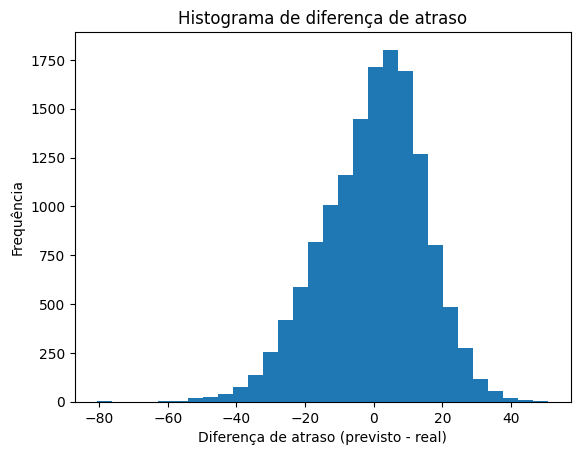

In [137]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Criando uma nova feature: is_weekend**

In [138]:
#Criando uma nova feature: is_weekend
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [139]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AJ,airline_EJ,...,origin_EXD,origin_HQL,origin_KVJ,origin_MEH,origin_QRA,origin_QVJ,origin_SWB,origin_XFM,origin_XOO,is_weekend
0,10,1,16.748745,18.748745,0,2010,0,38.999178,1,0,...,0,0,0,1,0,0,0,0,0,True
1,16,0,17.047995,19.047995,0,2010,0,21.181293,0,0,...,1,0,0,0,0,0,0,0,0,True
2,15,1,17.516443,21.516443,0,2010,0,54.581541,1,0,...,0,0,0,0,1,0,0,0,0,True
3,19,1,9.706046,12.706046,0,2010,0,57.561943,0,0,...,0,0,0,0,0,0,0,1,0,True
4,29,1,16.148951,18.148951,0,2010,0,49.325330,0,0,...,0,0,0,1,0,0,0,0,0,True


In [140]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({False: 0, True: 1})

In [141]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AJ,airline_EJ,...,origin_EXD,origin_HQL,origin_KVJ,origin_MEH,origin_QRA,origin_QVJ,origin_SWB,origin_XFM,origin_XOO,is_weekend
0,10,1,16.748745,18.748745,0,2010,0,38.999178,1,0,...,0,0,0,1,0,0,0,0,0,1
1,16,0,17.047995,19.047995,0,2010,0,21.181293,0,0,...,1,0,0,0,0,0,0,0,0,1
2,15,1,17.516443,21.516443,0,2010,0,54.581541,1,0,...,0,0,0,0,1,0,0,0,0,1
3,19,1,9.706046,12.706046,0,2010,0,57.561943,0,0,...,0,0,0,0,0,0,0,1,0,1
4,29,1,16.148951,18.148951,0,2010,0,49.325330,0,0,...,0,0,0,1,0,0,0,0,0,1


In [142]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 134.0381508819452
Root Mean Squared Error: 11.577484652632679
Mean Absolute Error: 8.947996157364852
R-squared: 0.7579935060551284


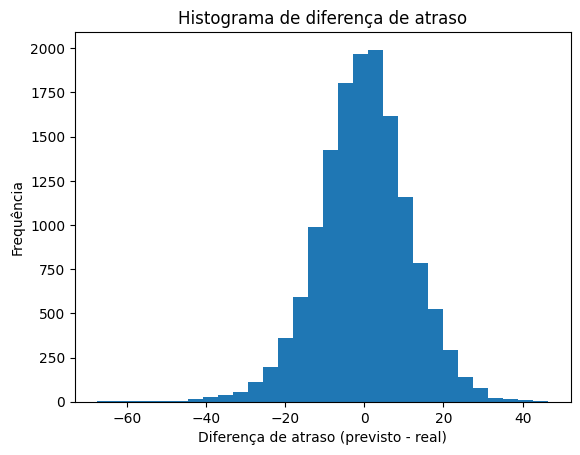

In [145]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Validação-cruzada**

In [147]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Definindo as métricas de avaliação
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Realizando a validação cruzada e calculando as métricas
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Extraindo as métricas de avaliação
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculando o desvio-padrão das métricas
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Imprimindo as métricas de avaliação e desvio-padrão
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [130.80090828 129.1285922  134.74197542 133.02438828 133.87262953]
RMSE Scores: [11.43682247 11.36347624 11.60784112 11.53361991 11.57033403]
MAE Scores: [8.87199358 8.76684525 8.95902087 8.94180015 8.92861038]
R2 Scores: [0.75982954 0.76136292 0.75642195 0.76126912 0.76267639]
----------------------------------------------------------------
MSE Mean: 132.3136987414426, MSE Std: 2.0622953763720733
RMSE Mean: 11.502418753815807, RMSE Std: 0.08978615321432451
MAE Mean: 8.893654047987791, MAE Std: 0.06980323986039166
R2 Mean: 0.7603119814762813, R2 Std: 0.0021436446258598194


###**Feature importance**

In [105]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibindo as importâncias das features
feature_importance_df

,Feature,Importance
3,airline_AJ,0.338147
21,is_weekend,0.181165
2,is_holiday,0.149468
8,aircraft_type_Boeing 737,0.105914
18,origin_SWB,0.091689
5,airline_HX,0.035229
1,arrival_time,0.021422
4,airline_EJ,0.019609
6,aircraft_type_Airbus A320,0.018103
19,origin_XFM,0.011475


###**Hiperparâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Criando o modelo
model = RandomForestRegressor()

# Realizando a busca em grade
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Obtendo o melhor modelo e seus hiperparâmetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_